In [ ]:
# Upload the train file from your local drive
from google.colab import files
uploaded = files.upload()

Saving TIR.txt to TIR.txt


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.0 MB/s eta 0:00:00


In [ ]:
! pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 115.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3542004 sha256=841fe71b104974624555fe87da0c90bc94a6374f8e6bfaaa11ff8c3e9e9c

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

from bertopic import BERTopic

In [ ]:
import pandas as pd

In [ ]:
# Load the corpus from a .txt file
with open('TIR.txt', 'r', encoding='utf-8') as file:  # Replace 'corpus.txt' with your corpus file path
    corpus = file.readlines()

# Clean the text data (example: remove special characters and convert to lowercase)
cleaned_corpus = [text.strip().lower() for text in corpus]

In [ ]:
# Initialize and fit the BERTopic model
topic_model = BERTopic()
topics, topic_embeddings = topic_model.fit_transform(cleaned_corpus)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,553,-1_00_the_to_of,"[00, the, to, of, and, is, in, as, may, related]",[- is related to the [industroyer](https://col...
1,0,305,0_now_that__,"[now, that, , , , , , , , ]","[, now that, now that]"
2,1,225,1_nan_related_prevent_should,"[nan, related, prevent, should, is, messages, ...",[nan is related to protocols used for device m...
3,2,61,2_trying_software_evasion_exploit,"[trying, software, evasion, exploit, code, adv...",[adversaries may exploit a software vulnerabil...
4,3,57,3_vulnerabilities_published_2h_ot,"[vulnerabilities, published, 2h, ot, 2022, xio...",[of the 688 published vulnerabilities in the t...
...,...,...,...,...,...
89,88,11,88_week_san_franciscos_moscone,"[week, san, franciscos, moscone, gets, center,...",[gets underway next week at san francisco‚äôs ...
90,89,11,89_virtualization_artifacts_vme_virtual,"[virtualization, artifacts, vme, virtual, type...",[they may also search for virtualization artif...
91,90,11,90_sizes_treatise_concerted_style,"[sizes, treatise, concerted, style, publicpriv...",[the leading players are partnering and innova...
92,91,11,91_last_watchdog_cybersecurity_surf,"[last, watchdog, cybersecurity, surf, videos, ...","[visit last watchdog to view videos, surf cybe..."


In [ ]:
freq = topic_model.get_topic_info() 
freq
topic_model.get_topic(freq.iloc[4]["Topic"])

[('vulnerabilities', 0.05015282891519799),
 ('published', 0.03585884584910664),
 ('2h', 0.032390113971754925),
 ('ot', 0.03130739428401089),
 ('2022', 0.028387018026171114),
 ('xiot', 0.02419887775862024),
 ('iot', 0.01787535909870853),
 ('vulnerability', 0.017667681791246104),
 ('were', 0.01695777114543708),
 ('of', 0.016520545897595555)]

In [ ]:
topic_model.get_topic(0)

[('now', 1.855809470541713),
 ('that', 0.39977504875699416),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05),
 ('', 1e-05)]

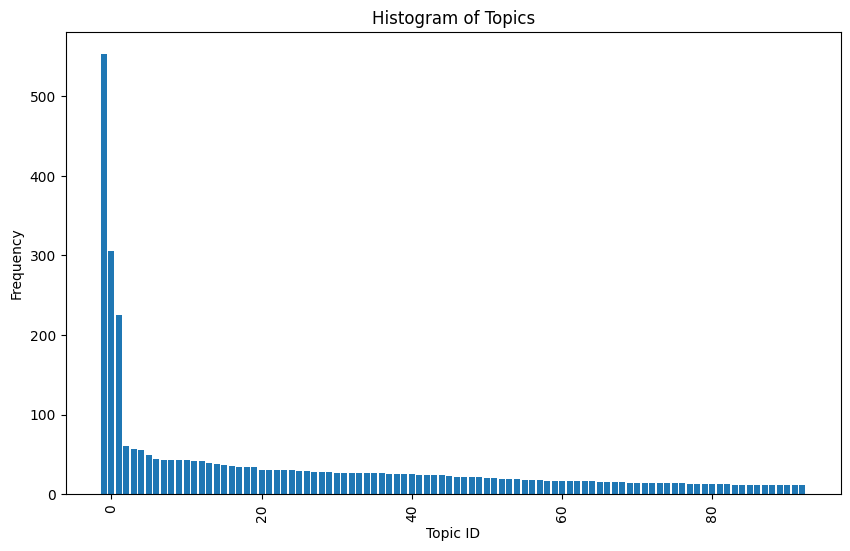

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you have the 'topics' variable from the BERTopic model

# Count the occurrence of each topic
topic_counts = Counter(topics)

# Extract the topic IDs and their frequencies
topic_ids = list(topic_counts.keys())
frequencies = list(topic_counts.values())

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(topic_ids, frequencies)
plt.xlabel('Topic ID')
plt.ylabel('Frequency')
plt.title('Histogram of Topics')
plt.xticks(rotation=90)
plt.show()



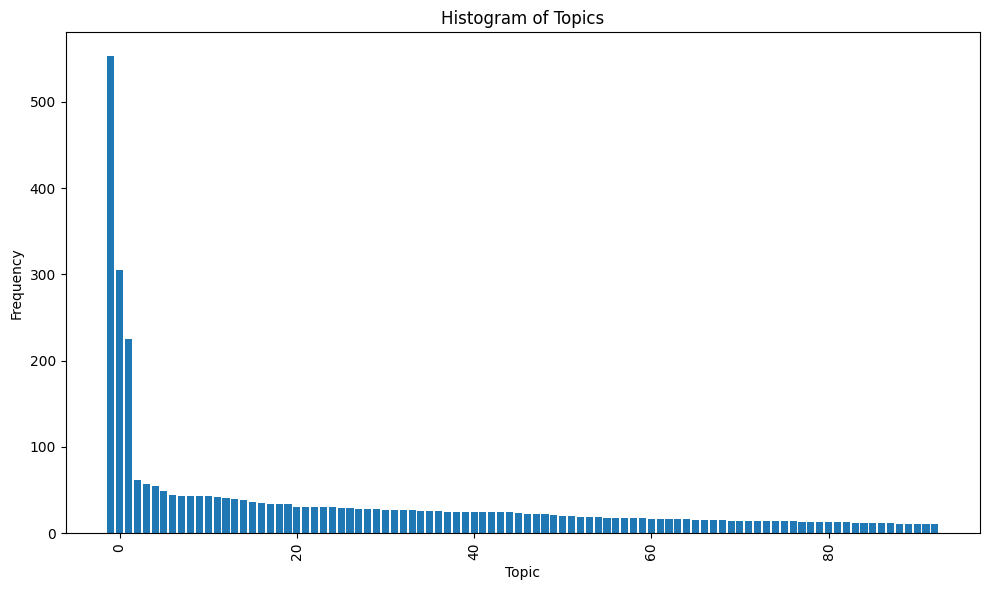

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you have the 'topics' variable from the BERTopic model

# Count the occurrence of each topic
topic_counts = Counter(topics)

# Extract the topic IDs and their frequencies
topic_names = list(topic_counts.keys())
frequencies = list(topic_counts.values())

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(topic_names, frequencies)
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Histogram of Topics')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [ ]:
# Get topic information
topic_info = topic_model.get_topic_info()
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,553,-1_00_the_to_of,"[00, the, to, of, and, is, in, as, may, related]",[- is related to the [industroyer](https://col...
1,0,305,0_now_that__,"[now, that, , , , , , , , ]","[, now that, now that]"
2,1,225,1_nan_related_prevent_should,"[nan, related, prevent, should, is, messages, ...",[nan is related to protocols used for device m...
3,2,61,2_trying_software_evasion_exploit,"[trying, software, evasion, exploit, code, adv...",[adversaries may exploit a software vulnerabil...
4,3,57,3_vulnerabilities_published_2h_ot,"[vulnerabilities, published, 2h, ot, 2022, xio...",[of the 688 published vulnerabilities in the t...
...,...,...,...,...,...
89,88,11,88_week_san_franciscos_moscone,"[week, san, franciscos, moscone, gets, center,...",[gets underway next week at san francisco‚äôs ...
90,89,11,89_virtualization_artifacts_vme_virtual,"[virtualization, artifacts, vme, virtual, type...",[they may also search for virtualization artif...
91,90,11,90_sizes_treatise_concerted_style,"[sizes, treatise, concerted, style, publicpriv...",[the leading players are partnering and innova...
92,91,11,91_last_watchdog_cybersecurity_surf,"[last, watchdog, cybersecurity, surf, videos, ...","[visit last watchdog to view videos, surf cybe..."


In [ ]:
# Define a label mapping dictionary
label_mapping = {0: "Tactics", 1: "Techniques", 2: "Procedures"}

# Rename the labels in the topic information
topic_info['Name'] = topic_info['Topic'].map(label_mapping)


In [ ]:
# Print the renamed topic information
print(topic_info)
topic_model.get_topic_info()

    Topic  Count        Name  \
0      -1    553         NaN   
1       0    305     Tactics   
2       1    225  Techniques   
3       2     61  Procedures   
4       3     57         NaN   
..    ...    ...         ...   
89     88     11         NaN   
90     89     11         NaN   
91     90     11         NaN   
92     91     11         NaN   
93     92     11         NaN   

                                       Representation  \
0    [00, the, to, of, and, is, in, as, may, related]   
1                         [now, that, , , , , , , , ]   
2   [nan, related, prevent, should, is, messages, ...   
3   [trying, software, evasion, exploit, code, adv...   
4   [vulnerabilities, published, 2h, ot, 2022, xio...   
..                                                ...   
89  [week, san, franciscos, moscone, gets, center,...   
90  [virtualization, artifacts, vme, virtual, type...   
91  [sizes, treatise, concerted, style, publicpriv...   
92  [last, watchdog, cybersecurity, surf, vid

,Topic,Count,Name,Representation,Representative_Docs
0,-1,553,-1_00_the_to_of,"[00, the, to, of, and, is, in, as, may, related]",[- is related to the [industroyer](https://col...
1,0,305,0_now_that__,"[now, that, , , , , , , , ]","[, now that, now that]"
2,1,225,1_nan_related_prevent_should,"[nan, related, prevent, should, is, messages, ...",[nan is related to protocols used for device m...
3,2,61,2_trying_software_evasion_exploit,"[trying, software, evasion, exploit, code, adv...",[adversaries may exploit a software vulnerabil...
4,3,57,3_vulnerabilities_published_2h_ot,"[vulnerabilities, published, 2h, ot, 2022, xio...",[of the 688 published vulnerabilities in the t...
...,...,...,...,...,...
89,88,11,88_week_san_franciscos_moscone,"[week, san, franciscos, moscone, gets, center,...",[gets underway next week at san francisco‚äôs ...
90,89,11,89_virtualization_artifacts_vme_virtual,"[virtualization, artifacts, vme, virtual, type...",[they may also search for virtualization artif...
91,90,11,90_sizes_treatise_concerted_style,"[sizes, treatise, concerted, style, publicpriv...",[the leading players are partnering and innova...
92,91,11,91_last_watchdog_cybersecurity_surf,"[last, watchdog, cybersecurity, surf, videos, ...","[visit last watchdog to view videos, surf cybe..."


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,553,-1_00_the_to_of,"[00, the, to, of, and, is, in, as, may, related]",[- is related to the [industroyer](https://col...
1,0,305,0_now_that__,"[now, that, , , , , , , , ]","[, now that, now that]"
2,1,225,1_nan_related_prevent_should,"[nan, related, prevent, should, is, messages, ...",[nan is related to protocols used for device m...
3,2,61,2_trying_software_evasion_exploit,"[trying, software, evasion, exploit, code, adv...",[adversaries may exploit a software vulnerabil...
4,3,57,3_vulnerabilities_published_2h_ot,"[vulnerabilities, published, 2h, ot, 2022, xio...",[of the 688 published vulnerabilities in the t...
...,...,...,...,...,...
89,88,11,88_week_san_franciscos_moscone,"[week, san, franciscos, moscone, gets, center,...",[gets underway next week at san francisco‚äôs ...
90,89,11,89_virtualization_artifacts_vme_virtual,"[virtualization, artifacts, vme, virtual, type...",[they may also search for virtualization artif...
91,90,11,90_sizes_treatise_concerted_style,"[sizes, treatise, concerted, style, publicpriv...",[the leading players are partnering and innova...
92,91,11,91_last_watchdog_cybersecurity_surf,"[last, watchdog, cybersecurity, surf, videos, ...","[visit last watchdog to view videos, surf cybe..."


In [ ]:
pip install bertopic google-colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
output_path = '/content/drive/MyDrive/bertopic_output'
topic_model.save(output_path)

In [ ]:
similar_topics, similarity = \
topic_model.find_topics("procedure", top_n = 3) 

In [ ]:
print("Most Similar Topic Info: \n{}".format(topic_model.get_topic(similar_topics[0])))
print("Similarity Score: {}".format(similarity[0]))

print("\n Most Similar Topic Info: \n{}".format(topic_model.get_topic(similar_topics[1])))
print("Similarity Score: {}".format(similarity[1]))

print("\n Most Similar Topic Info: \n{}".format(topic_model.get_topic(similar_topics[2])))
print("Similarity Score: {}".format(similarity[2]))

Most Similar Topic Info: 
[('scanning', 0.08270232509495498), ('patch', 0.08155576881301055), ('software', 0.08139151024449158), ('update', 0.07111080688298793), ('regularly', 0.06872992516671717), ('vulnerabilities', 0.061628976237557996), ('vulnerability', 0.05538383442664033), ('oldschool', 0.0522235974657327), ('retool', 0.0522235974657327), ('exploitable', 0.046415621180881675)]
Similarity Score: 0.27073079347610474

 Most Similar Topic Info: 
[('tactical', 0.20871310533574156), ('represent', 0.1955445933636954), ('subtechnique', 0.17396721009527305), ('performing', 0.16585123240734148), ('reason', 0.15643567469095632), ('tactics', 0.1528367950983977), ('action', 0.14462107352669176), ('goal', 0.1391406718249195), ('attck', 0.1270317124485752), ('adversarys', 0.12535979265770456)]
Similarity Score: 0.21800677478313446

 Most Similar Topic Info: 
[('school', 0.142540875368385), ('arquilla', 0.142540875368385), ('professor', 0.142540875368385), ('postgraduate', 0.142540875368385), (

In [ ]:
similar_topics, similarity = \
topic_model.find_topics("tactic", top_n = 3) 

In [ ]:
print("Most Similar Topic Info: \n{}".format(topic_model.get_topic(similar_topics[0])))
print("Similarity Score: {}".format(similarity[0]))

print("\n Most Similar Topic Info: \n{}".format(topic_model.get_topic(similar_topics[1])))
print("Similarity Score: {}".format(similarity[1]))

print("\n Most Similar Topic Info: \n{}".format(topic_model.get_topic(similar_topics[2])))
print("Similarity Score: {}".format(similarity[2]))

Most Similar Topic Info: 
[('tactical', 0.20871310533574156), ('represent', 0.1955445933636954), ('subtechnique', 0.17396721009527305), ('performing', 0.16585123240734148), ('reason', 0.15643567469095632), ('tactics', 0.1528367950983977), ('action', 0.14462107352669176), ('goal', 0.1391406718249195), ('attck', 0.1270317124485752), ('adversarys', 0.12535979265770456)]
Similarity Score: 0.6822054386138916

 Most Similar Topic Info: 
[('imminent', 0.3653268708601186), ('threats', 0.33817420271601845), ('highlighted', 0.13895494139685333), ('gravity', 0.13895494139685333), ('threat', 0.08761561077633642), ('ukraine', 0.08214614833130064), ('conquer', 0.07817117104933574), ('redoubling', 0.07817117104933574), ('material', 0.0730835533414731), ('these', 0.04411469104736404)]
Similarity Score: 0.39221417903900146

 Most Similar Topic Info: 
[('now', 1.855809470541713), ('that', 0.39977504875699416), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), (''

In [ ]:
similar_topics, similarity = \
topic_model.find_topics("technique", top_n = 3) 

In [ ]:
print("Most Similar Topic Info: \n{}".format(topic_model.get_topic(similar_topics[0])))
print("Similarity Score: {}".format(similarity[0]))

print("\n Most Similar Topic Info: \n{}".format(topic_model.get_topic(similar_topics[1])))
print("Similarity Score: {}".format(similarity[1]))

print("\n Most Similar Topic Info: \n{}".format(topic_model.get_topic(similar_topics[2])))
print("Similarity Score: {}".format(similarity[2]))

Most Similar Topic Info: 
[('tactical', 0.20871310533574156), ('represent', 0.1955445933636954), ('subtechnique', 0.17396721009527305), ('performing', 0.16585123240734148), ('reason', 0.15643567469095632), ('tactics', 0.1528367950983977), ('action', 0.14462107352669176), ('goal', 0.1391406718249195), ('attck', 0.1270317124485752), ('adversarys', 0.12535979265770456)]
Similarity Score: 0.4624907374382019

 Most Similar Topic Info: 
[('now', 1.855809470541713), ('that', 0.39977504875699416), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05)]
Similarity Score: 0.31433114409446716

 Most Similar Topic Info: 
[('training', 0.08709737874517665), ('awareness', 0.08510033722964298), ('topics', 0.06367734194151106), ('content', 0.058279022845643895), ('your', 0.058149364916768684), ('spearphishing', 0.044507412543896854), ('keep', 0.043395825738849036), ('its', 0.03993876383850324), ('contextualize', 0.03983723140014225), ('bitesize', 0.03983